##### Support Vector Machine Draws a hyper plane in a dimensional space such that it maximizes margin between classification groups

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df["target"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* Check what is target_name 

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

* check from where 1 or 2 (target) starts

In [16]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [17]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


* apply function -> one column to generate another columns.
* Lambda is small function or a tranformation that we can apply on target column and we can generate new column

In [20]:
df["flower_name"]=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [28]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


#### Petal length vs Pepal Width (Setosa vs Versicolor)

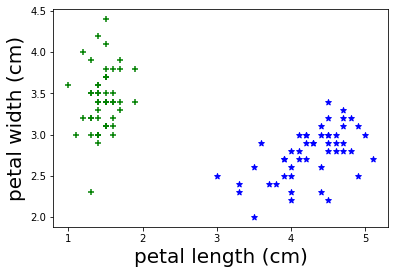

In [35]:
plt.xlabel("petal length (cm)",fontsize=20)
plt.ylabel("petal width (cm)",fontsize=20)
plt.scatter(df0["petal length (cm)"],df0["sepal width (cm)"],color="green",marker='+')
plt.scatter(df1["petal length (cm)"],df1["sepal width (cm)"],color="blue",marker='*')

##### Sepal length vs Sepal Width (Setosa vs Versicolor)

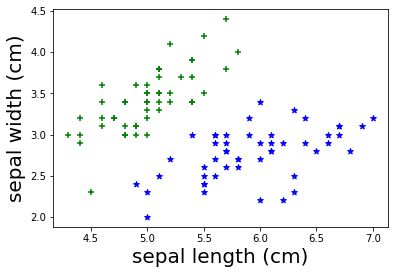

In [36]:
plt.xlabel("sepal length (cm)",fontsize=20)
plt.ylabel("sepal width (cm)",fontsize=20)
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="green",marker='+')
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",marker='*')

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
x=df.drop(["target","flower_name"],axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [45]:
len(x_train)

120

In [46]:
from sklearn.svm import SVC
model = SVC()

* place the cursor on SVC , shift + Tab -- > to display 

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

In [47]:
model.fit(x_train,y_train)

SVC()

In [48]:
model.score(x_test,y_test)

0.9666666666666667

## Tune parameters
##### Regularization (C)

In [51]:
model = SVC(C=10)

In [52]:
model.fit(x_train,y_train)

SVC(C=10)

In [53]:
model.score(x_test,y_test)

0.9333333333333333

#### Kernel

In [57]:
model = SVC(kernel='linear')

In [59]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [60]:
model.score(x_test,y_test)

0.9666666666666667